<a href="https://colab.research.google.com/github/anandkc812/data-analytics/blob/master/Corona_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt2
#import pydeck as pdk
from PIL import Image
import seaborn as sns
import time

In [25]:
from google.colab import drive
PATH = 'gdrive/My Drive/data/Corona/'

print(PATH)


drive.mount('/content/gdrive')

#!unzip -q gdrive/'My Drive'/data/creditcardfraud.zip

#st.title('Coronavirus COVID19 Visualization')
#st.sidebar.title('Coronavirus')
#image = Image.open('D:/DataScience/image.jpg')
#st.sidebar.image(image, caption='Coronaviruse', use_column_width=True)
#st.sidebar.subheader('Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans. ')

data_ll       = pd.read_csv(PATH+'COVID19_line_list_data.csv')
data_ol       = pd.read_csv(PATH+'COVID19_open_line_list.csv')
data          = pd.read_csv(PATH+'covid_19_data.csv')
data_ts_death = pd.read_csv(PATH+'time_series_covid_19_deaths.csv')
data_ts_recov = pd.read_csv(PATH+'time_series_covid_19_recovered.csv')
data_ts_conf  = pd.read_csv(PATH+'time_series_covid_19_confirmed.csv')

data.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)
data_ts_death.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)
data_ts_recov.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)
data_ts_conf.rename(columns={'Province/State':'Province_State', 'Country/Region':'Country_Region'},inplace=True)

print("Config Complete")

gdrive/My Drive/data/Corona/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Config Complete


68 68


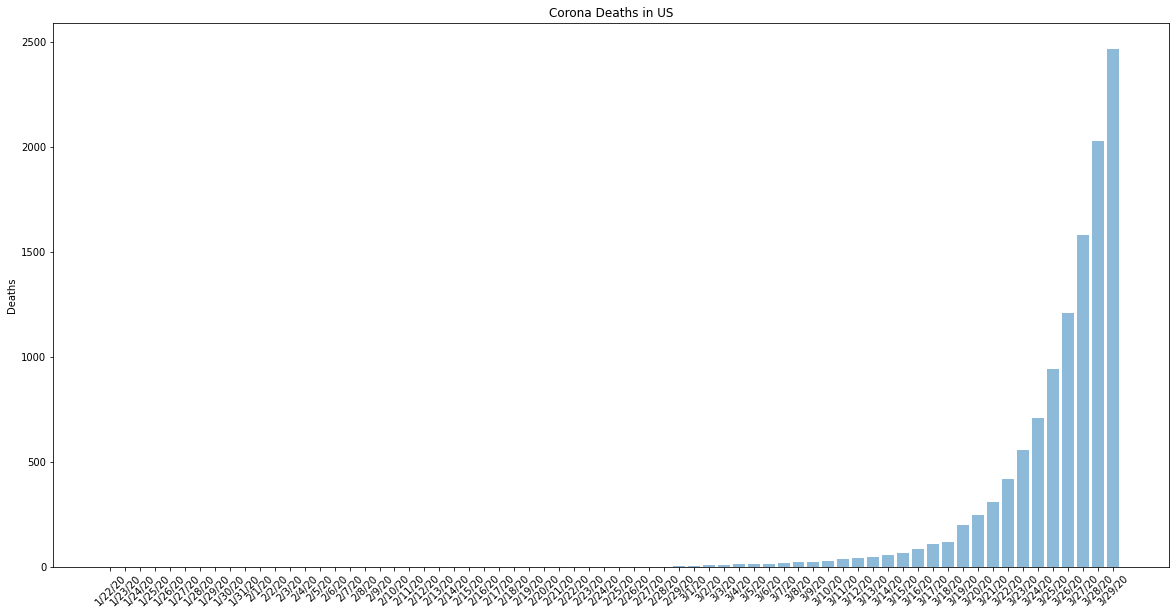

In [66]:

def plot_bar(x, y, ylable, Title):
    

    plt.figure(figsize=(20,10))
    print(len(x), len(y))

    plt.bar(x, y, align='center', alpha=0.5)
    plt.xticks(x, x, rotation=45)
    plt.ylabel(ylable)
    plt.title(Title)

    plt.show()


d = data_ts_death.drop(['Province_State','Lat','Long'], axis=1)
idx = d[d['Country_Region']== 'US' ].index.item()

df = d.loc[idx]
x2 = df[1:]

df = d['Country_Region'].value_counts()


plot_bar(x2.index, x2.iloc[0:,], "Deaths", "Corona Deaths in US")



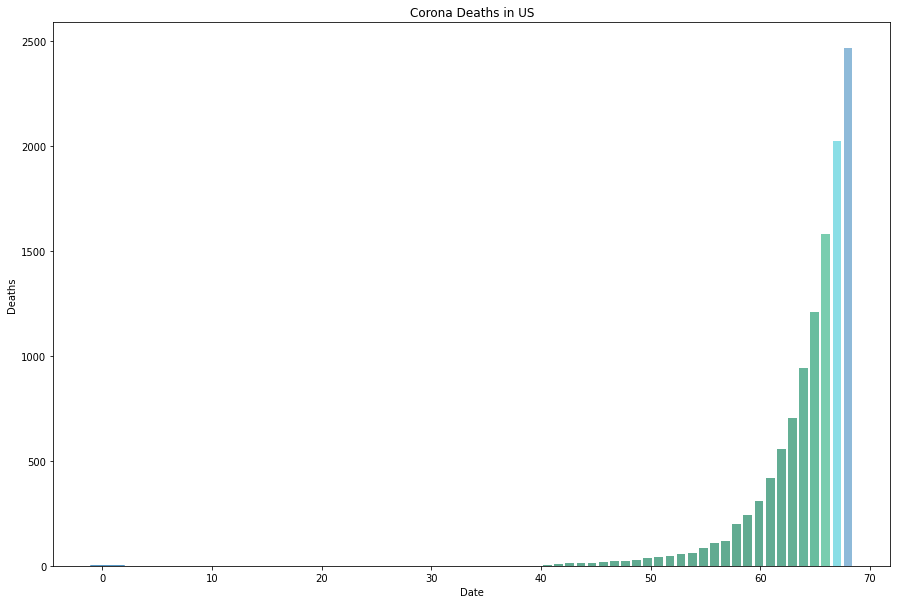

In [95]:

def animate_bar(t, y, ylable, Title):
    

    #print(len(t), len(y))

    x = np.linspace(0,len(t),len(t))
    #print(len(x), len(y))
    #print(x)

 

    fig, ax = plt.subplots(figsize=(15,10))

    #ax.bar(x, y, align='center', alpha=0.5)
    #fig.xticks(x, x, rotation=45)

    ax.bar([0, x.max()], [0, y.max()], align='center', alpha=0.5)
    ax.set(xlabel="Date",ylabel=ylable)
    ax.title.set_text(Title)
    #ax.title(Title)

    #l, = ax.plot([-1,len(x)], [0,y.max()])
    l, = ax.plot([-1,2], [0, 0])

    animate = lambda i: ax.bar( x[:i], y[:i] , align='center', alpha=0.5)
    #animate = lambda i: l.set_data( x[:i], y[:i] )

    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(x))
    return ani



d = data_ts_death.drop(['Province_State','Lat','Long'], axis=1)
idx = d[d['Country_Region']== 'US' ].index.item()

df = d.loc[idx]
x2 = df[1:]

df = d['Country_Region'].value_counts()


ani = animate_bar(x2.index, x2.iloc[0:,], "Deaths", "Corona Deaths in US")
#ani = animate(x, max_x)
HTML(ani.to_jshtml())




Index(['3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20'],
      dtype='object')
     3/20/20  3/21/20  3/22/20  3/23/20  ...  3/26/20  3/27/20  3/28/20  3/29/20
0          0        0        1        1  ...        4        4        4        4
1          2        2        2        4  ...        6        8       10       10
2         11       15       17       17  ...       25       26       29       31
3          0        0        1        1  ...        3        3        3        6
4          0        0        0        0  ...        0        0        0        2
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
248        0        0        0        0  ...        0        0        0        0
249        0        0        0        0  ...        0        0        0        0
250        0        0        0        0  ...        0        0        0        0
251        0        0        0        0  ..

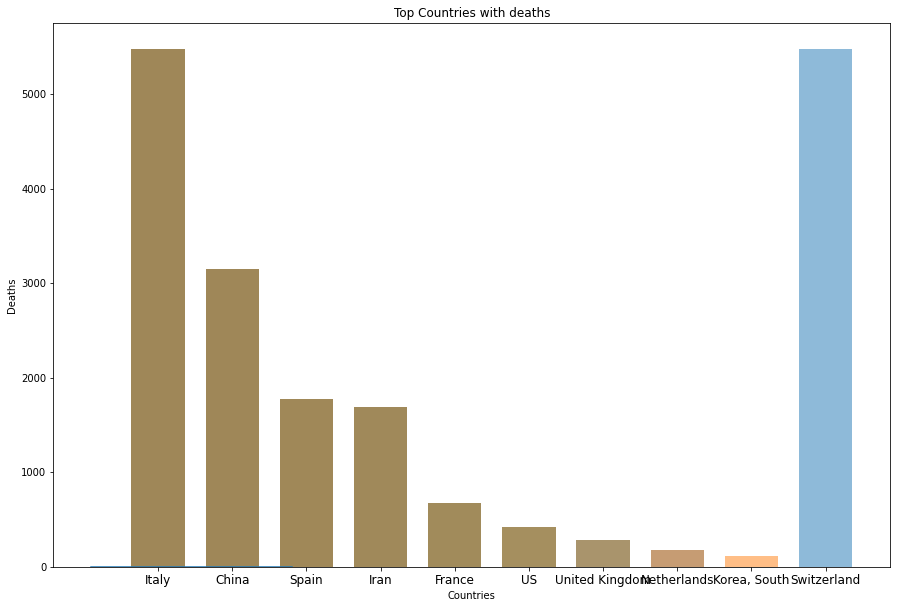

In [129]:



#df = d['Country_Region'].value_counts()
#print(d)
col = d.columns

col1 = col[num_col-10:]
num_col = len(col)
#print(col[1:])

df = d.loc[:, col1]

print(col1)
print(df)


def get_top(d, id):
    print("--------------column", id)
    s = d.loc[:, id].T
    #print(s)
    top_affected = s.sort_values(ascending=False).index
    #print(s.sort_index(axis=0))
    t = d.loc[top_affected[:10], id]
    c = d.loc[top_affected[:10], 'Country_Region']
    return t, c


t, c = get_top(d, col1[1])

print("Top Numbers ")
print(t)
print("Top Countries ")
print(c)


def animate_bar_2(d, cols , ylable, Title):

    id = cols[2]
    print("Starting index ", id)

    y ,t = get_top(d, id)


    x = np.linspace(0,len(t),len(t))
    print("Len x , y", len(x), len(t))
    #print(x)

    fig, ax = plt.subplots(figsize=(15,10))

    #ax.bar(x, y, align='center', alpha=0.5)
    ax.set_xticks(x)
    ax.set_xticklabels( t, fontsize=12)
    #ax.set_yticks(y)


    ax.bar([0, x.max()], [0, y.max()], align='center', alpha=0.5)
    ax.set(xlabel="Countries",ylabel=ylable)
    ax.title.set_text(Title)
    #ax.title(Title)

    #l, = ax.plot([-1,len(x)], [0,y.max()])
    l, = ax.plot([-1,2], [0, 0])

    animate = lambda i:   ax.bar( x[:i], y[:i] , align='center', alpha=0.5)
    #animate = lambda i: l.set_data( x[:i], y[:i] )

    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(x))

    return ani


ani = animate_bar_2(d, col1, "Deaths", "Top Countries with deaths")
#ani = animate(x, max_x)
HTML(ani.to_jshtml())

